In [1]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0


In [0]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [0]:
# data loading
data = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = data.load_data()

In [0]:
# normalization
x_train = x_train / 255
x_test = x_test / 255

In [40]:
# add color channel for CNN
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [0]:
# get number of classes
K = len(set(y_train))

In [0]:
# build the model
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(K, activation='softmax')(x)

In [0]:
# compile the model
model = Model(i, x)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [44]:
# train the model
r = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/sample - loss: 0.5424 - accuracy: 0.7990 - val_loss: 0.3928 - val_accuracy: 0.8495
Epoch 2/20
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3775 - accuracy: 0.8585 - val_loss: 0.3566 - val_accuracy: 0.8674
Epoch 3/20
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3278 - accuracy: 0.8774 - val_loss: 0.3376 - val_accuracy: 0.8700
Epoch 4/20
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2963 - accuracy: 0.8885 - val_loss: 0.3036 - val_accuracy: 0.8853
Epoch 5/20
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2726 - accuracy: 0.8963 - val_loss: 0.2954 - val_accuracy: 0.8926
Epoch 6/20
60000/60000 [==============================] - 7s 108us/sample - loss: 0.2537 - accuracy: 0.9055 - val_loss: 0.3002 - val_accuracy: 0.8922
Epoch 7/20
60000/60000 [==========================

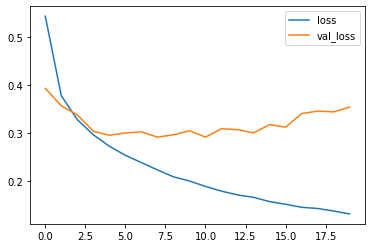

In [45]:
# plot loss history
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

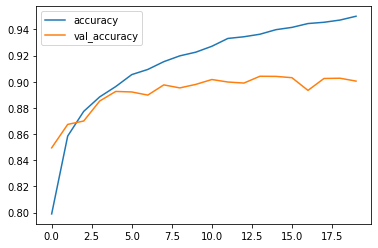

In [46]:
# plot accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[826   2  19  23   2   2 119   0   7   0]
 [  3 975   2  11   5   0   3   0   1   0]
 [ 15   1 831  10  46   1  92   0   4   0]
 [ 11   5  12 920  24   0  26   0   2   0]
 [  0   0  56  26 830   0  84   0   4   0]
 [  0   0   0   1   0 976   0  15   0   8]
 [ 78   0  48  33  73   0 751   0  17   0]
 [  0   0   0   0   0  18   0 957   1  24]
 [  1   1   2   3   4   1   4   1 982   1]
 [  1   0   0   0   0   8   0  34   0 957]]


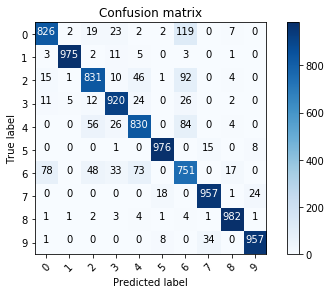

In [47]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

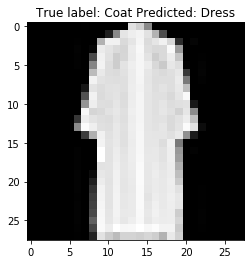

In [57]:
# plot misclassified samples
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));